# Эксперименты с цифрами

## Подготовка

In [1]:
# Подключаем библиотеки
import os
os.chdir("..")

from compiled_wrapper import scidi_wrapper

import pandas
import numpy as np
import json
import random
import time 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
f = open('test_data/positive.seq')
data = f.readlines()
f.close()
str_data = [list(elem.split(':')[1])[:-2] for elem in data]

Посмотрим, как выглядят наши цифры

In [3]:
# Функция для визуализации

features = [[[0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],],
            [[1, 1, 1, 1, 1],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],],
            [[0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],],
            [[0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0],
             [1, 1, 1, 1, 1],],
            [[1, 0, 0, 0, 0],
             [1, 0, 0, 0, 0],
             [1, 0, 0, 0, 0],
             [1, 0, 0, 0, 0],
             [1, 0, 0, 0, 0],],
            [[0, 0, 0, 0, 1],
             [0, 0, 0, 1, 0],
             [0, 0, 1, 0, 0],
             [0, 1, 0, 0, 0],
             [1, 0, 0, 0, 0],],
            [[1, 0, 0, 0, 0],
             [0, 1, 0, 0, 0],
             [0, 0, 1, 0, 0],
             [0, 0, 0, 1, 0],
             [0, 0, 0, 0, 1],],
            [[1, 0, 1, 0, 1],
             [0, 1, 0, 1, 0],
             [1, 0, 1, 0, 1],
             [0, 1, 0, 1, 0],
             [1, 0, 1, 0, 1],],
            [[-1, 0, -1, 0, -1],
             [0, -1, 0, -1, 0],
             [-1, 0, -1, 0, -1],
             [0, -1, 0, -1, 0],
             [-1, 0, -1, 0, -1],]]

def getVisualizationMatrix(obj):
    obj_img = np.empty((0,20))
    for i in range(6):
        current_raw = np.empty((5,0))
        for j in range(4):
            current_raw = np.concatenate((current_raw, np.array(features[int(obj[i*4 + j]) - 1])), axis = 1)
        obj_img = np.concatenate((obj_img, current_raw), axis = 0)
    return obj_img 
            

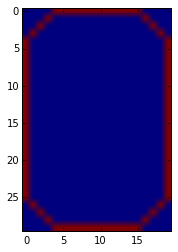

In [4]:
plt.imshow(getVisualizationMatrix(str_data[0]))
plt.show()

In [5]:
sw = scidi_wrapper.ScidiWrapper()

In [6]:
# Вспомогательная функция для обработки естественных классов
def mapToNoNoise(item):
    item = item [1:]

    item = [int(i) for i in item]
    if len(item) > 0:
        return min(item)
    return 0
    

## Эксперимент с одинарным пропуском

In [7]:
# Загрузим правила. Данные правила были получены на объектах с пропусками и шумом
f = open("test_data/numbers/rules.txt", 'r')
rules = f.readlines()
f.close()

rules = map(lambda x: x[:-1], rules)
rules[-10:]

['1=6 & 20=1 & 21=6 => 24=4',
 '2=2 & 9=5 & 18= not 7 => 24= not 4',
 '2=2 & 16=7 => 24= not 4',
 '2=2 & 17=5 => 24= not 4',
 '3=2 & 7=1 & 9= not 1 => 24= not 4',
 '6=1 & 14=2 => 24= not 4',
 '7= not 3 & 9=5 & 19=1 => 24= not 4',
 '14=2 & 22=4 => 24= not 4',
 '14=2 & 23=4 => 24= not 4',
 '18=1 & 20=3 => 24= not 4']

In [8]:
# Загружаем данные и правила в естественную классификацию
sw.setData(str_data)
sw.setRulesFromStringVector(rules)

In [9]:
len(sw.getRules())

52145

In [10]:
# Создаем естественные классы объектов
sw.makeClasses()

In [11]:
# Получим все естественные класссы
denoised_classes = map(lambda z: tuple(map(lambda x: mapToNoNoise(x), z)), sw.getIdealObjects())

# Число естественных классов
print len(set(denoised_classes))

class_ids = sw.getClasses()

12


In [12]:
# Число естественных классов
len(set(denoised_classes))

12

In [13]:
len(class_ids)

360

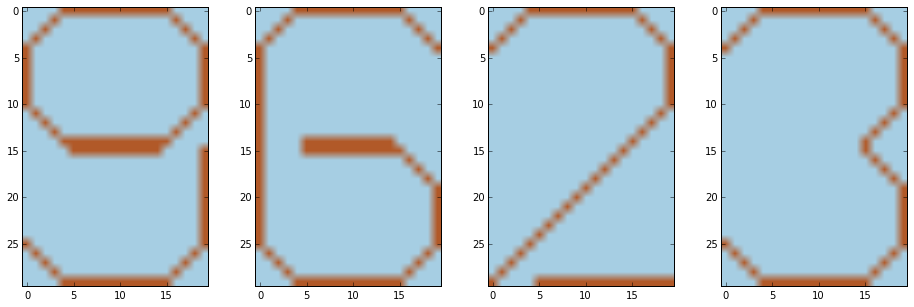

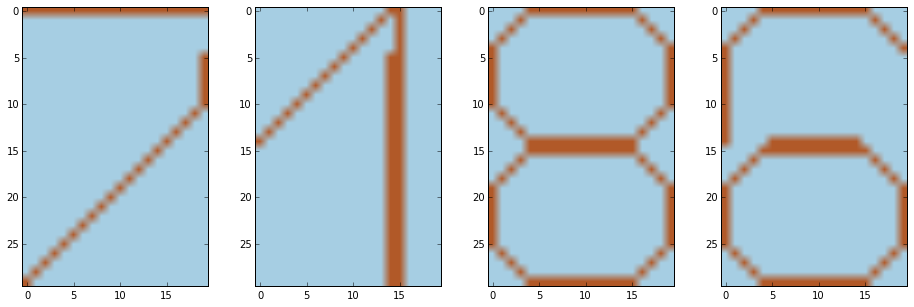

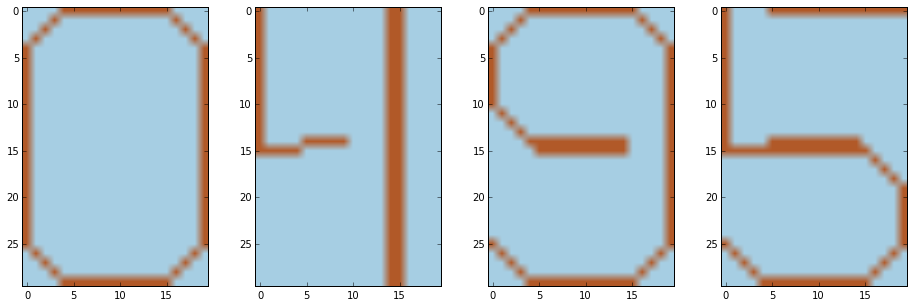

In [14]:
# Выведем получившиеся классы:

from matplotlib import cm
unique_classes = list(set(denoised_classes))

width =  4
height = int ((len(unique_classes) * 1.0 - 1) / width) + 1 

for j in range(0, height):
    plt.figure(figsize = (16, 5))
    for i in range(width):
        if i + width * j >= len(unique_classes):
            break
        img = getVisualizationMatrix(unique_classes[i + width * j])
        plt.subplot(1, width, i + 1)
        plt.imshow(img, cmap = cm.Paired)
    
    plt.show()

In [15]:
# Выведем соответствия класс - объект:
def plotObjVersusIdeal(str_data, class_ids, denoised_classes):
    width =  4
    height = len(class_ids) / width


    
    for i in range(height * 2):
        plt.figure(figsize = (14, 5))
        for j in range(1, width + 1):
            if (i*width + j - 1) / 2 >= len(str_data):
                break

            if (j % 2  == 1):
                img_orig = getVisualizationMatrix(str_data[(i*width + j - 1) / 2])
                plt.subplot(1, width, j)

                plt.title("original {0}".format((i*width + j - 1) / 2))
                plt.imshow(img_orig, cmap = cm.Paired)


            else:
                img = getVisualizationMatrix(denoised_classes[class_ids[(i*width + j - 1) / 2]])
                plt.subplot(1, width, j)
                plt.title("ideal {0}".format((i*width + j - 1) / 2))
                plt.imshow(img, cmap = cm.Paired)


        plt.show()


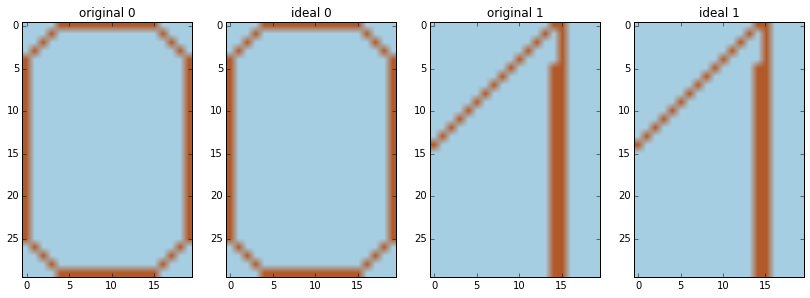

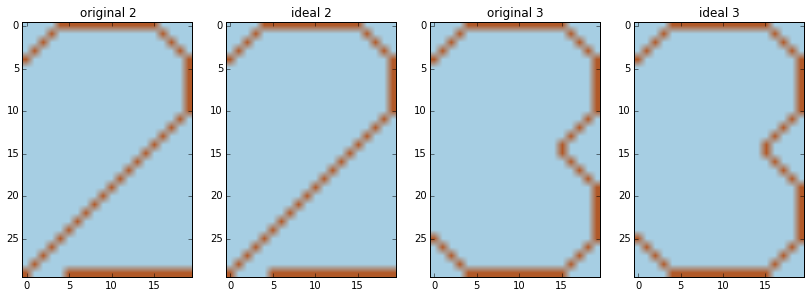

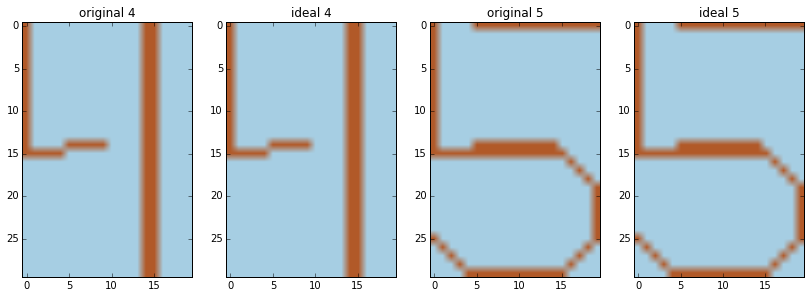

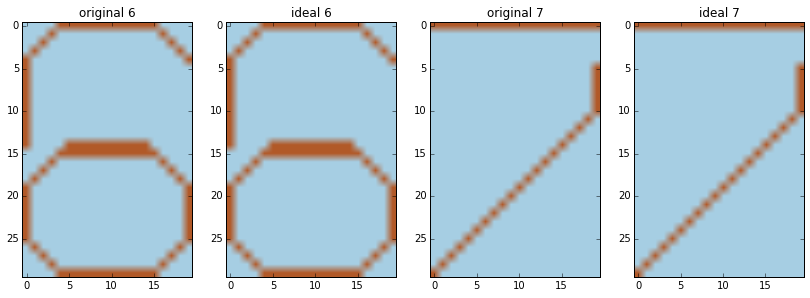

In [53]:
plotObjVersusIdeal(str_data[: 10], class_ids[:10], denoised_classes)

In [85]:
# Случайные подмножества правил!

rules = np.array(rules)
rules_subset_idx = np.random.choice(range(rules.shape[0]), 20, replace=False)
rules_subset_idx.sort()
print rules[rules_subset_idx][:5]

['10=4 & 16=5 & 19=3 => 1=5' '1=6 & 21=7 & 22=4 => 2=2'
 '4=2 & 12=6 & 23=1 => 6=1' '5=5 & 8=3 & 11=4 => 7=1'
 '1=5 & 2=1 & 20=5 => 9=5']


In [86]:
sw.setData(str_data)
sw.setRulesFromStringVector(list(rules[rules_subset_idx]))

In [87]:
# Создаем естественные классы объектов
sw.makeClasses()

In [88]:
# Получим все естественные класссы
denoised_classes = map(lambda z: tuple(map(lambda x: mapToNoNoise(x), z)), sw.getIdealObjects())

# Число естественных классов
print len(set(denoised_classes))

class_ids = sw.getClasses()

9


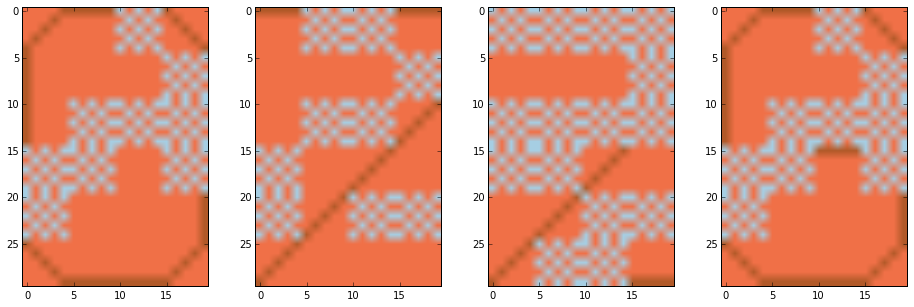

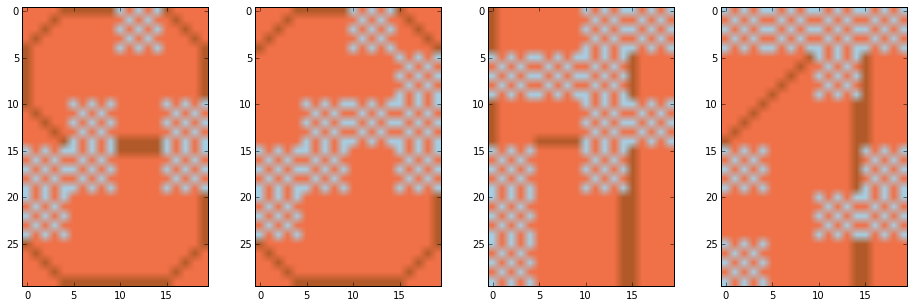

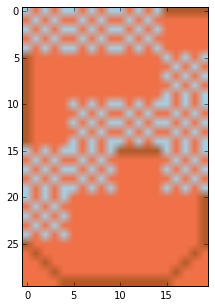

In [89]:
# Выведем получившиеся классы:

from matplotlib import cm
unique_classes = list(set(denoised_classes))

width =  4
height = int ((len(unique_classes) * 1.0 - 1) / width) + 1 

for j in range(0, height):
    plt.figure(figsize = (16, 5))
    for i in range(width):
        if i + width * j >= len(unique_classes):
            break
        img = getVisualizationMatrix(unique_classes[i + width * j])
        plt.subplot(1, width, i + 1)
        plt.imshow(img, cmap = cm.Paired)
    
    plt.show()

In [90]:
list_rules = list(rules)

In [99]:
def pred_filter(rule):
    for p in range(13, 25):
        if (str(p) + '=') in rule:
            return False
    return True
    

In [100]:
list_rules = filter(pred_filter, list_rules)

In [101]:
len(list_rules)

2309

In [102]:
sw.setData(str_data)
sw.setRulesFromStringVector(list_rules)

In [103]:
# Создаем естественные классы объектов
sw.makeClasses()

In [104]:
# Получим все естественные класссы
denoised_classes = map(lambda z: tuple(map(lambda x: mapToNoNoise(x), z)), sw.getIdealObjects())

# Число естественных классов
print len(set(denoised_classes))

class_ids = sw.getClasses()

9


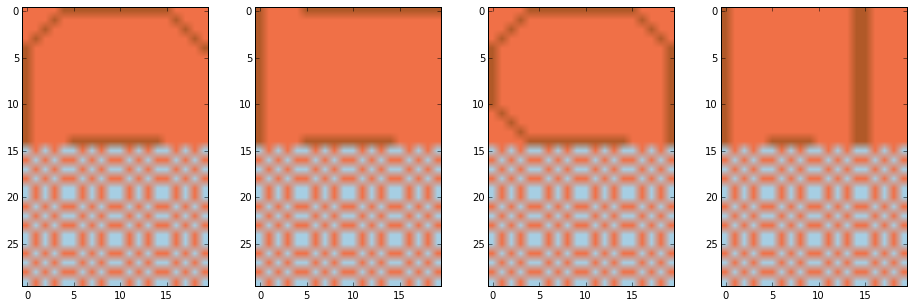

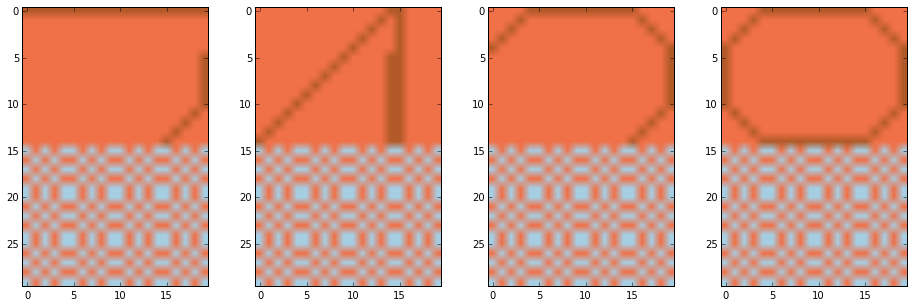

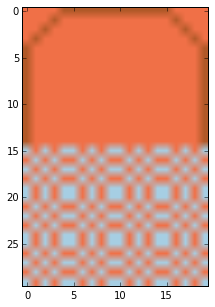

In [105]:
# Выведем получившиеся классы:

from matplotlib import cm
unique_classes = list(set(denoised_classes))

width =  4
height = int ((len(unique_classes) * 1.0 - 1) / width) + 1 

for j in range(0, height):
    plt.figure(figsize = (16, 5))
    for i in range(width):
        if i + width * j >= len(unique_classes):
            break
        img = getVisualizationMatrix(unique_classes[i + width * j])
        plt.subplot(1, width, i + 1)
        plt.imshow(img, cmap = cm.Paired)
    
    plt.show()